<a href="https://colab.research.google.com/github/shreevasatantry/Auto_ml/blob/main/AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Auto-sklearn**

In [1]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 29 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,287 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3.0.12-1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.12-1_amd64.deb ...
Unpackin

In [1]:
import sklearn
import autosklearn.classification as classifier
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [4]:
!pip install dask[complete] distributed --upgrade

     |████████████████████████████████| 931kB 5.5MB/s 
Requirement already up-to-date: distributed in /usr/local/lib/python3.7/dist-packages (2021.3.0)
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0


In [8]:
from sklearn import datasets
X,y = datasets.load_iris(return_X_y = True)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [9]:
automlclassifier = classifier.AutoSklearnClassifier(time_left_for_this_task=180,per_run_time_limit=40)
automlclassifier.fit(X_train,y_train)

[WARNING] [2021-03-16 07:03:23,437:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-03-16 07:03:30,671:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-03-16 07:03:37,357:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-03-16 07:03:44,109:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-03-16 07:03:45,622:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-03-16 07:03:46,894:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] 

AutoSklearnClassifier(per_run_time_limit=40, time_left_for_this_task=180)

In [10]:
from sklearn.metrics import accuracy_score
y_pred = automlclassifier.predict(X_test)

In [11]:
score = accuracy_score(y_test,y_pred)
print(score)

0.9473684210526315


In [12]:
automlclassifier.show_models()

"[(0.060000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'feature_agglomeration', 'classifier:gradient_boosting:early_stop': 'off', 'classifier:gradient_boosting:l2_regularization': 4.86248954040124e-10, 'classifier:gradient_boosting:learning_rate': 0.08250492256977829, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 36, 'classifier:gradient_boosting:min_samples_leaf': 20, 'classifier:gradient_boosting:scoring':

In [14]:
#########################################################################################################################################################

## **Auto-Keras**

In [15]:
!pip install autokeras

     |████████████████████████████████| 174kB 4.0MB/s 
     |████████████████████████████████| 71kB 3.6MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=be798354504ea0ff659ca9d764962b12a93d6c388a53ed003e80ef59adf3202a
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=dc477a540475b42cdcb9f4eb69653d2863a914053a88d65275c0a86d1ebe8595
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import autokeras as ak
import matplotlib.pyplot as plt

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
[5 0 4]


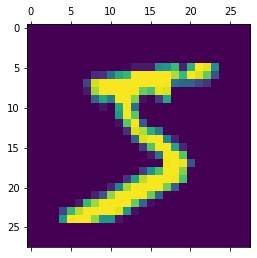

In [21]:
plt.matshow(x_train[0])
plt.show()

In [18]:
# Initialize the image classifier.
clf = ak.ImageClassifier(overwrite=True, max_trials=1)
# Feed the image classifier with training data.
clf.fit(x_train, y_train, epochs=10)


# Predict with the best model.
predicted_y = clf.predict(x_test)
print(predicted_y)


# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

Trial 1 Complete [00h 20m 53s]
val_loss: 0.0424836240708828

Best val_loss So Far: 0.0424836240708828
Total elapsed time: 00h 20m 53s
Epoch 1/10
[WARNING] [2021-03-16 09:29:21,488:tensorflow] AutoGraph could not transform <function Model.make_train_function.<locals>.train_function at 0x7feb66458170> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry

In [ ]:
#############################################################################################################################################################################